In [18]:
import subprocess
import mrc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, Normalize
from matplotlib.cm import ScalarMappable

makeotf /Users/talley/Desktop/mat_otf.dv /Users/talley/Desktop/mat_otf_otf.dv -angle -0.8043 -ls 0.2035 -na 1.4058 -nimm 1.515 -fixorigin 3 20 -leavekz 8 10 2


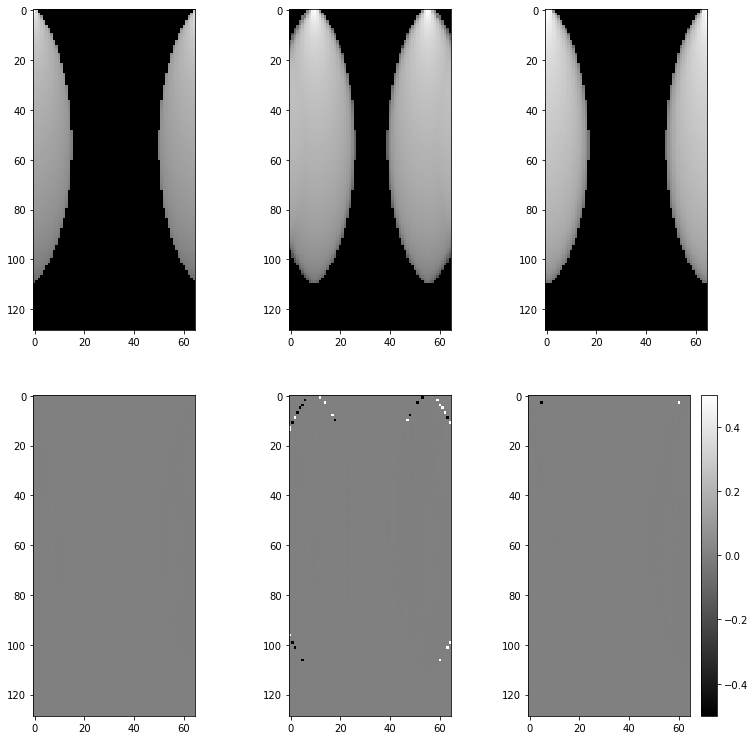

In [35]:
psffile = '/Users/talley/Desktop/mat_otf.dv'

angles = [-0.804300]
linespacing = 0.2035
NA = 1.42
nimm = 1.515

otffile = psffile.replace(".dv", "_otf.dv")
cmd = (f'makeotf {psffile} {otffile} -angle {angles[0]} -ls {linespacing}'
       f' -na {NA*0.99} -nimm {nimm} -fixorigin 3 20 -leavekz 8 10 2')
print(cmd)
subprocess.check_call(cmd.split())
im = mrc.bindFile(otffile)
fig, axs = plt.subplots(2, 3, figsize=(13,13))
otfscale = [-.5, .5]
axs[0, 0].imshow(np.abs(im[0]), norm=PowerNorm(gamma=0.1))
axs[0, 1].imshow(np.abs(im[1]), norm=PowerNorm(gamma=0.1))
axs[0, 2].imshow(np.abs(im[2]), norm=PowerNorm(gamma=0.1))
axs[1, 0].imshow(np.angle(im[0]), vmin=otfscale[0], vmax=otfscale[1])
axs[1, 1].imshow(np.angle(im[1]), vmin=otfscale[0], vmax=otfscale[1])
axs[1, 2].imshow(np.angle(im[2]), vmin=otfscale[0], vmax=otfscale[1])
_ = fig.colorbar(ScalarMappable(Normalize(*otfscale)))